# Script for fitting N14 from pulsed odmr

In [1]:
import pylab as pb
import time

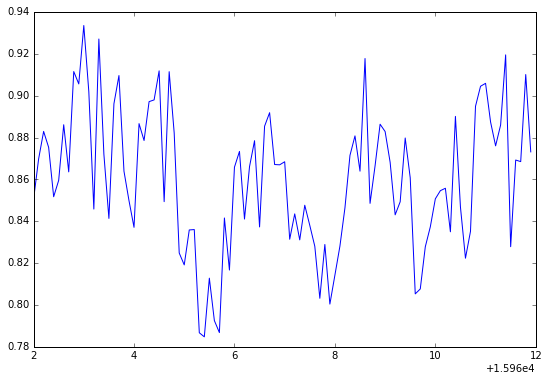

In [2]:
pb.plot(pulsedmeasurement.signal_plot_x, pulsedmeasurement.signal_plot_y)
pb.show()

In [3]:
freqs = pulsedmeasurement.signal_plot_x * 10**6
norm_vals = pulsedmeasurement.signal_plot_y

In [4]:
results = fitlogic.make_N14_fit(axis=freqs, data=norm_vals)

In [5]:
mod, params = fitlogic.make_multiplelorentzian_model(no_of_lor=3)

In [6]:
type(mod)

<class 'lmfit.model.CompositeModel'>

In [7]:
results.params.pretty_print()

Name                   Value      Min      Max   Stderr     Vary     Expr
c                     0.8861     -inf      inf 0.004801     True     None
lorentz0_amplitude  -1.171e+05     -inf   -1e-06 2.07e+04     True     None
lorentz0_center     1.597e+10     -inf      inf 4.165e+04     True     None
lorentz0_sigma      3.945e+05  2.5e+04  9.9e+06 6.836e+04     True     None
lorentz1_amplitude  -8.78e+04     -inf   -1e-06 1.739e+04     True     None
lorentz1_center     1.597e+10     -inf      inf 4.165e+04    False lorentz0_center+2.15*1e6
lorentz1_sigma      3.945e+05  2.5e+04  9.9e+06 6.836e+04    False lorentz0_sigma
lorentz2_amplitude  -7.466e+04     -inf   -1e-06 1.79e+04     True     None
lorentz2_center     1.597e+10     -inf      inf 4.165e+04    False lorentz0_center+4.3*1e6
lorentz2_sigma      3.945e+05  2.5e+04  9.9e+06 6.836e+04    False lorentz0_sigma


In [8]:
results.params['lorentz0_center'].value

15965510803.570164

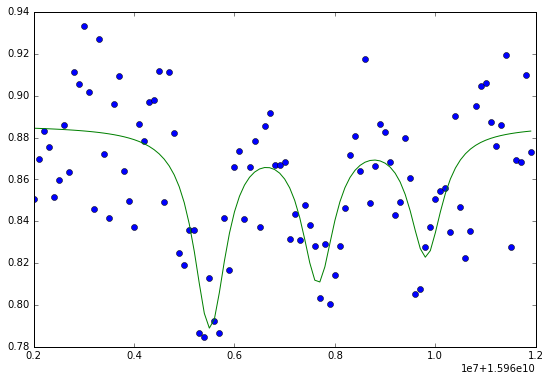

In [9]:
pb.plot(freqs, pulsedmeasurement.signal_plot_y, 'o')
pb.plot(freqs, results.best_fit)
pb.show()

In [33]:
results.params['lorentz0_center'].value, results.params['lorentz1_center'].value, results.params['lorentz2_center'].value

(7475563108.547321, 7477713108.547321, 7479863108.547321)

In [28]:
while True:
    time.wait(30)
    confocal.refocus_clicked()